In [1]:
import DS_functions as df
from DS_functions import steam

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import pytz

In [ ]:
df.numbersOfReviewByTime([["06:00:00", "10:59:59"],["11:00:00", "13:59:59"], ["14:00:00",  "16:59:59"], ["17:00:00", "19:59:59"], ["20:00:00", "23:59:59"], ["00:00:00", "02:59:59"],["03:00:00", "05:59:59"]]);

In [5]:
df.mostPopularReviewers(3)

,author.num_reviews
author.steamid,
76561198103272004,4398046511108
76561198848008157,4398046511105
76561198125392509,5236


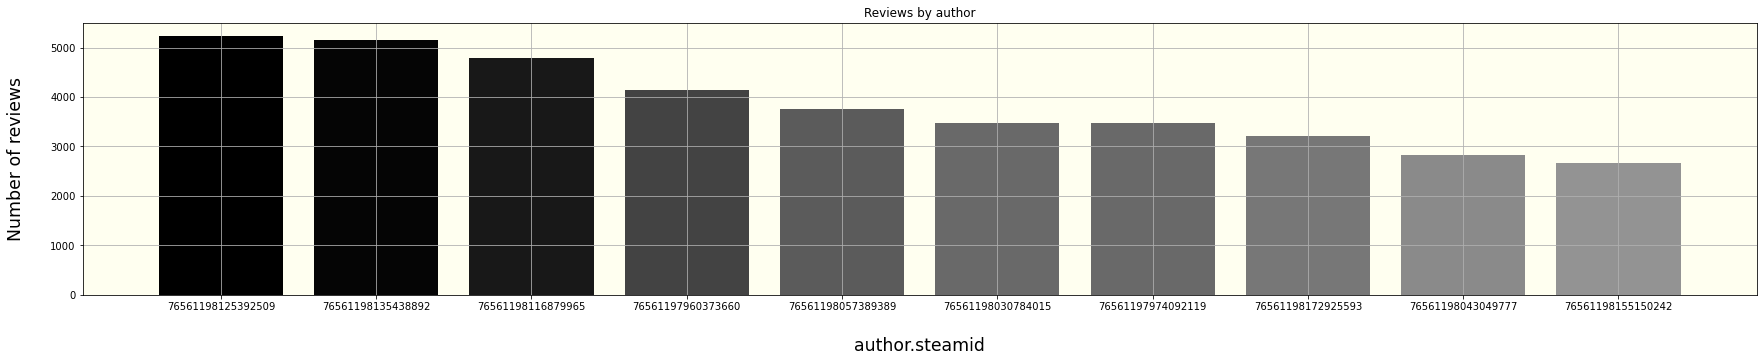

In [5]:
df.mostPopularReviewers_plot(10);

In [21]:
df.numberOfReviewsByApplication(10)

NameError: name 'df' is not defined

In [ ]:
df.plotBestAuthor_updater(3)

In [ ]:
def histOfTimeStampUpdated(delta):

    #Get dates from the dataset and set it all at the same day
    dates = steam[["timestamp_updated", "timestamp_created"]]
    dates = dates[dates["timestamp_created"] != dates["timestamp_updated"]]
    dates = dates["timestamp_updated"]

    #convert all the dates in to float
    mpl_data = mdates.date2num(dates)
       
    #create the bins on range  
    binns = np.arange(min(mpl_data), max(mpl_data)+delta , delta) 
    
    #plot the result
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches((30,5))
    n, bins, temp = ax.hist(mpl_data, bins=binns , color="k")
    locator = mdates.AutoDateLocator()
    ax.grid()
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
    plt.xlabel("Time", labelpad=25.0, size="xx-large")
    plt.ylabel("Number of reviews", labelpad=25.0, size="xx-large")
    plt.title("Number of reviews during time")
    
    #create a colormap for the value
    my_cmap = plt.get_cmap('Greys')
    col = (n-n.min())/(n.max()-n.min())
 
    for c, p in zip(col, temp):
        plt.setp(p, 'facecolor', my_cmap(c))
        
    
    #create the legend with the max valueb
    temp = mdates.num2date(bins)
    maxvalSX = temp[np.where(n==max(n))[0][0]]
    maxvalDX = mdates.num2date(bins[np.where(n==max(n))[0][0]]+59)
    maxval = str(maxvalSX) + "|" + str(maxvalDX)
    plt.legend(["max value = " + maxval])


    return n, bins, maxval

In [ ]:
n, bins, maxval = histOfDateTime(delta=60);

,language,review_id
5,english,9635437
20,schinese,3764967
19,russian,2348900
0,brazilian,837524
21,spanish,813320
8,german,752596
25,turkish,635868
13,koreana,613632
7,french,541751
16,polish,495529


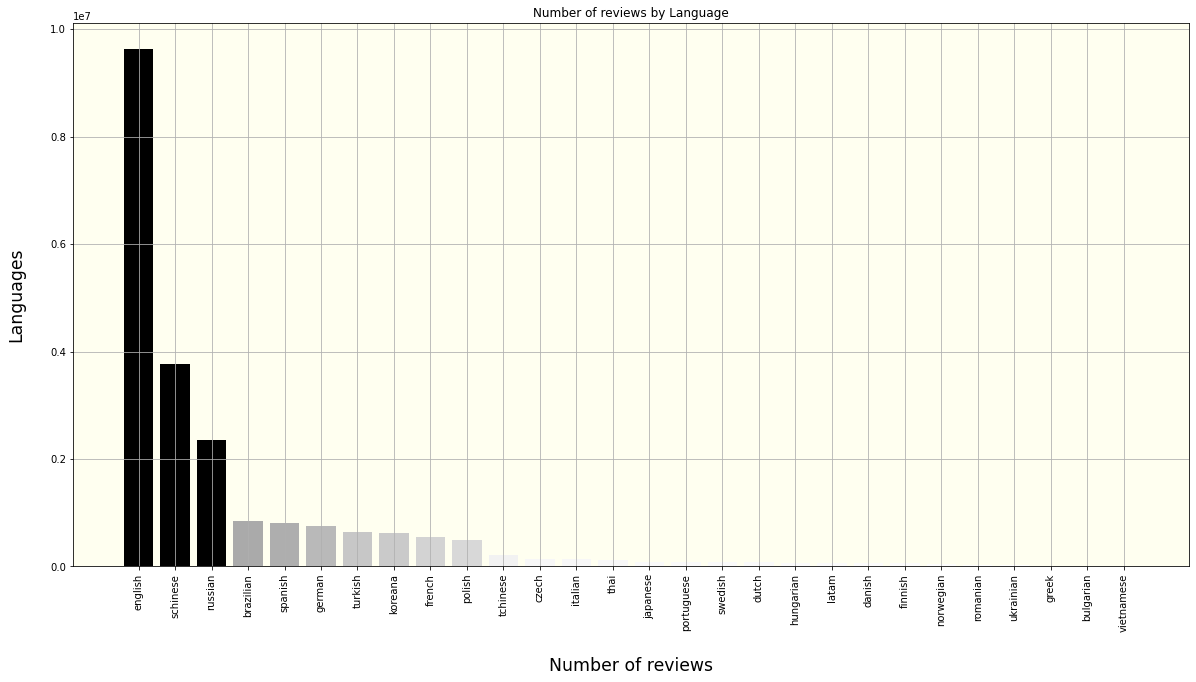

In [20]:
plot_reviewsByLanguage()

In [19]:
def plot_color(values, size=(30,5), coef=0.2):
    plt.rcParams['axes.facecolor'] = 'ivory'
    plt.figure(figsize=size)
    plt.grid()
    my_cmap = plt.get_cmap('Greys')
    my_norm = plt.Normalize(vmin=0, vmax=max(values)*coef)
    colormap=my_cmap(my_norm(values))
    
    return colormap

# =========================================

In [ ]:
76561198949504115

In [8]:
steam.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,...,True,False,False,76561199095369542,6,2,1 days 07:49:00,1 days 00:08:00,1 days 07:49:00,2021-01-22 19:23:03
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,0,...,True,False,False,76561199090098988,5,1,0 days 17:41:00,0 days 17:41:00,0 days 17:40:00,2021-01-23 06:36:17
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,0,...,True,False,False,76561199054755373,5,3,3 days 21:07:00,2 days 05:20:00,3 days 20:04:00,2021-01-23 06:35:44
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,0,...,True,False,False,76561199028326951,7,4,0 days 03:37:00,0 days 00:42:00,0 days 03:37:00,2021-01-16 09:10:49
5,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",2021-01-23 05:21:04,2021-01-23 05:21:04,True,0,0,...,True,False,False,76561198170193529,11,1,0 days 13:43:00,0 days 13:43:00,0 days 13:43:00,2021-01-23 05:20:01


,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
5663042,413150,Stardew Valley,61995164,english,I think my favorite part of this game is the m...,2020-01-17 20:31:55,2020-01-17 20:31:55,True,0,0,...,True,False,False,76561198848008157,45,4398046511105,1 days 01:05:00,0 days,0 days 21:46:00,2020-06-20 02:16:00


In [4]:
df.timedelta_updated_created().sort_values()

0             0 days 00:00:00
13988625      0 days 00:00:00
13988624      0 days 00:00:00
13988623      0 days 00:00:00
13988622      0 days 00:00:00
                  ...        
1561448    3710 days 12:51:16
3538179    7790 days 08:35:39
9287506    7794 days 00:01:21
10694935   7959 days 20:10:23
14636770   8069 days 20:08:16
Length: 21747368, dtype: timedelta64[ns]

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
19179657,218620,PAYDAY 2,51047390,russian,завтра мы идем грабить пятёрочку,2019-06-04 14:00:28,2019-06-04 14:00:24,True,2,0,...,True,False,False,76561198331063747,42,8,0 days 19:57:00,0 days,0 days 16:31:00,2019-08-26 10:02:55


In [3]:
steam[steam["timestamp_updated"] < steam["timestamp_created"]]

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
